# Project 8 - Decision trees and neural networks

## Set Up

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from graphviz import Source
from IPython.display import SVG

## Read & Clean the Data

Also update the name of the target column to not include a space at the beginning.

(Not using this on anymore)
And add a new target column that includes the top 25% as popular (1) and the bottom 75% as unpopular (0).

Also add a new target column that includes any article with at least 1400 shares as popular (1) and those below 1400 as unpopular (0).

In [2]:
news = pd.read_csv('OnlineNewsPopularity.csv')
news = news.rename({' shares':'shares'}, axis=1)
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
news['popular'] = news.shares.apply(lambda x: 1 if x >= news.shares.quantile(.75) else 0)
news['viral'] = news.shares.apply(lambda x: 1 if x >= 100000 else 0)
news['pop_alt'] = news.shares.apply(lambda x: 1 if x >= 1400 else 0)
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,viral,pop_alt
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0,0,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0,0,1
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,0,0,1
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,0,0,1
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,0,0,0


Here we can see some statistics for the original target column and the new target columnn.

In [4]:
news['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [5]:
news['popular'].describe()

count    39644.000000
mean         0.251968
std          0.434148
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: popular, dtype: float64

In [6]:
news['viral'].describe()

count    39644.000000
mean         0.001463
std          0.038222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: viral, dtype: float64

Some more exploratory data analysis and visualization. 

The scatterplot plots the shares over time. The correlation matrices look for the features that are most correlated with the target variables.

In [ ]:
sns.scatterplot(data=news,x=' timedelta',y='shares')

In [7]:
news[' timedelta'].describe()

count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name:  timedelta, dtype: float64

In [8]:
news = news.drop(columns=['url'])

In [9]:
correlation_matrix = news.corr()
correlation_matrix[correlation_matrix['shares'] > 0.04]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,viral,pop_alt
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404,0.081103,0.011691,0.090229
kw_avg_max,-0.493093,0.115746,-0.096460,0.000805,-0.002939,-0.002006,-0.019269,-0.064747,0.002217,0.136228,...,0.014258,-0.022972,0.047235,-0.010713,-0.015096,0.035188,0.044686,0.047419,0.021330,0.015844
kw_max_avg,-0.051820,0.006918,-0.030496,-0.002120,-0.003408,-0.003694,0.069692,-0.013629,0.064374,0.045002,...,-0.023987,-0.024168,0.049935,0.018949,-0.012426,0.051628,0.064306,0.092392,0.034086,0.070496
kw_avg_avg,-0.163164,0.004296,-0.079624,-0.002083,-0.005415,-0.005944,0.121419,-0.015615,0.145236,0.106815,...,-0.020253,-0.046697,0.097761,0.035678,-0.023865,0.098671,0.110413,0.185173,0.044026,0.157787
self_reference_min_shares,-0.011438,-0.004563,-0.030686,0.001036,0.000339,0.000989,-0.004804,-0.031229,0.007142,-0.003075,...,-0.011390,-0.046718,0.005464,0.000570,0.002361,0.005261,0.055958,0.057898,0.033047,0.052911
self_reference_max_shares,-0.014501,0.000128,0.025657,-0.000222,0.000170,-0.000077,0.080394,0.130187,0.035067,0.078296,...,-0.047108,-0.022557,0.013754,0.004789,-0.004935,0.008720,0.047115,0.063177,0.027259,0.060666
self_reference_avg_sharess,-0.015655,0.000661,-0.013809,0.001992,0.001614,0.002009,0.025239,0.022157,0.020898,0.034494,...,-0.029052,-0.043748,0.010175,0.000930,-0.001442,0.006897,0.057789,0.071027,0.027906,0.065304
LDA_03,-0.030838,0.042208,-0.140141,-0.003689,-0.009761,-0.009781,0.123786,-0.028775,0.208924,0.267673,...,-0.025578,-0.074780,0.129062,0.027687,-0.013784,0.122120,0.083771,0.106033,0.030591,0.058595
shares,0.008662,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,...,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135,1.000000,0.314024,0.662020,0.199891
popular,0.030597,-0.027102,0.017720,0.007467,0.007600,0.006525,0.081103,0.014677,0.068466,0.023946,...,-0.021451,-0.010337,0.042517,0.038673,0.003335,0.047249,0.314024,1.000000,0.065952,0.542606


In [10]:
correlation_matrix = news.corr()
correlation_matrix[correlation_matrix['popular'] > 0.06]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,viral,pop_alt
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404,0.081103,0.011691,0.090229
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388,0.068466,0.007501,0.067193
data_channel_is_socmed,0.076287,-0.090394,0.033424,-0.000945,-0.000078,-0.000526,0.050470,0.092126,-0.007626,-0.008038,...,0.000557,-0.011331,-0.016793,0.024436,0.011669,-0.003181,0.005021,0.070919,-0.006740,0.112044
kw_min_avg,-0.157204,-0.002370,-0.022286,0.004563,0.003284,0.002510,0.058920,0.039239,0.081029,0.058866,...,-0.004458,-0.009388,0.045342,0.024973,-0.016834,0.054769,0.039551,0.091829,0.007788,0.090708
kw_max_avg,-0.051820,0.006918,-0.030496,-0.002120,-0.003408,-0.003694,0.069692,-0.013629,0.064374,0.045002,...,-0.023987,-0.024168,0.049935,0.018949,-0.012426,0.051628,0.064306,0.092392,0.034086,0.070496
kw_avg_avg,-0.163164,0.004296,-0.079624,-0.002083,-0.005415,-0.005944,0.121419,-0.015615,0.145236,0.106815,...,-0.020253,-0.046697,0.097761,0.035678,-0.023865,0.098671,0.110413,0.185173,0.044026,0.157787
self_reference_max_shares,-0.014501,0.000128,0.025657,-0.000222,0.000170,-0.000077,0.080394,0.130187,0.035067,0.078296,...,-0.047108,-0.022557,0.013754,0.004789,-0.004935,0.008720,0.047115,0.063177,0.027259,0.060666
self_reference_avg_sharess,-0.015655,0.000661,-0.013809,0.001992,0.001614,0.002009,0.025239,0.022157,0.020898,0.034494,...,-0.029052,-0.043748,0.010175,0.000930,-0.001442,0.006897,0.057789,0.071027,0.027906,0.065304
weekday_is_sunday,0.004226,0.006289,0.036394,-0.001803,-0.001338,-0.002167,0.044220,0.021455,0.043306,-0.014579,...,-0.023060,-0.003549,0.024554,0.019118,-0.027632,0.033855,0.008230,0.061962,-0.010424,0.083874
is_weekend,0.000272,-0.005996,0.052024,-0.003186,-0.002082,-0.003502,0.072279,0.047798,0.053242,-0.016054,...,-0.038512,0.003032,0.023956,0.032343,-0.035015,0.036490,0.016958,0.089276,-0.010943,0.140852


In [11]:
correlation_matrix = news.corr()
correlation_matrix[correlation_matrix['viral'] > 0.03]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,viral,pop_alt
kw_max_avg,-0.051820,0.006918,-0.030496,-0.002120,-0.003408,-0.003694,0.069692,-0.013629,0.064374,0.045002,...,-0.023987,-0.024168,0.049935,0.018949,-0.012426,0.051628,0.064306,0.092392,0.034086,0.070496
kw_avg_avg,-0.163164,0.004296,-0.079624,-0.002083,-0.005415,-0.005944,0.121419,-0.015615,0.145236,0.106815,...,-0.020253,-0.046697,0.097761,0.035678,-0.023865,0.098671,0.110413,0.185173,0.044026,0.157787
self_reference_min_shares,-0.011438,-0.004563,-0.030686,0.001036,0.000339,0.000989,-0.004804,-0.031229,0.007142,-0.003075,...,-0.011390,-0.046718,0.005464,0.000570,0.002361,0.005261,0.055958,0.057898,0.033047,0.052911
LDA_03,-0.030838,0.042208,-0.140141,-0.003689,-0.009761,-0.009781,0.123786,-0.028775,0.208924,0.267673,...,-0.025578,-0.074780,0.129062,0.027687,-0.013784,0.122120,0.083771,0.106033,0.030591,0.058595
shares,0.008662,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,...,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135,1.000000,0.314024,0.662020,0.199891
popular,0.030597,-0.027102,0.017720,0.007467,0.007600,0.006525,0.081103,0.014677,0.068466,0.023946,...,-0.021451,-0.010337,0.042517,0.038673,0.003335,0.047249,0.314024,1.000000,0.065952,0.542606
viral,0.000860,0.009326,-0.000140,-0.000461,-0.000731,-0.000764,0.011691,-0.004285,0.007501,0.009078,...,-0.006233,-0.013236,0.006914,-0.000623,0.004665,0.008624,0.662020,0.065952,1.000000,0.035786
pop_alt,0.043146,-0.044013,0.041433,0.002837,0.004115,0.002092,0.090229,0.040520,0.067193,0.007351,...,-0.000459,0.000299,0.032414,0.053474,0.003166,0.040607,0.199891,0.542606,0.035786,1.000000


## Analysis

### Feature Selection

Our dataset had about 60 features. We did not want to use all 60 in the interest of time. We selected a few features based on the following: perceived ease of use, what we found interesting, and what we thought would be good predictors.

**Selected Features:**

n_tokens_content, num_keywords, is_weekend, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world


**Target Variable:**

popular (0,1)

In [17]:
# create a list of feature columns
feature_cols = [' n_tokens_content',' num_keywords',' is_weekend',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world']

# trying some different features
# feature_cols = [' num_hrefs',' num_imgs',' data_channel_is_socmed',' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_max_shares',' self_reference_avg_sharess',' weekday_is_sunday',' is_weekend',' LDA_03']

# feature_cols = [' num_hrefs',' kw_avg_max',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' LDA_03']

X = news[feature_cols]
y = news.pop_alt

### Tree 1: Max Depth = 3

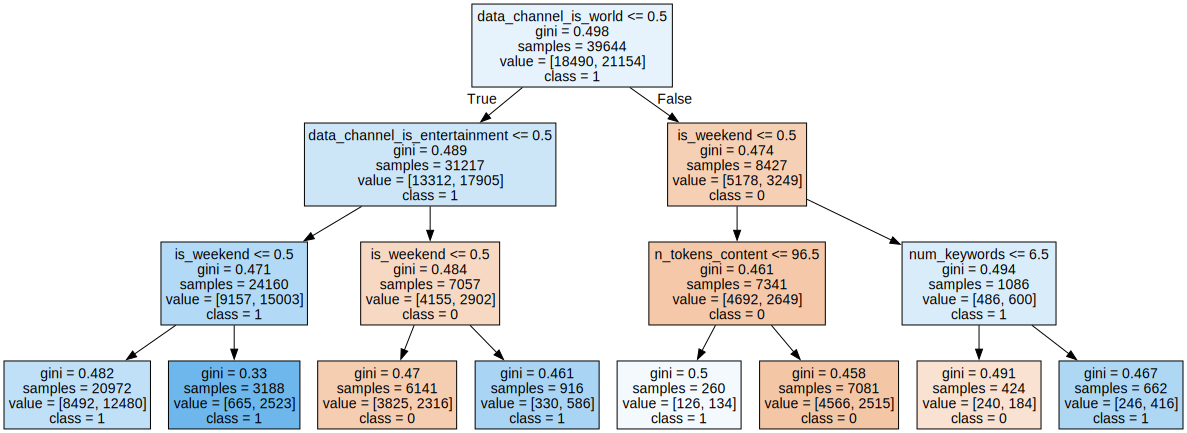

In [18]:
# fit a classification tree with max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

### Tree 2: Max Depth = 5

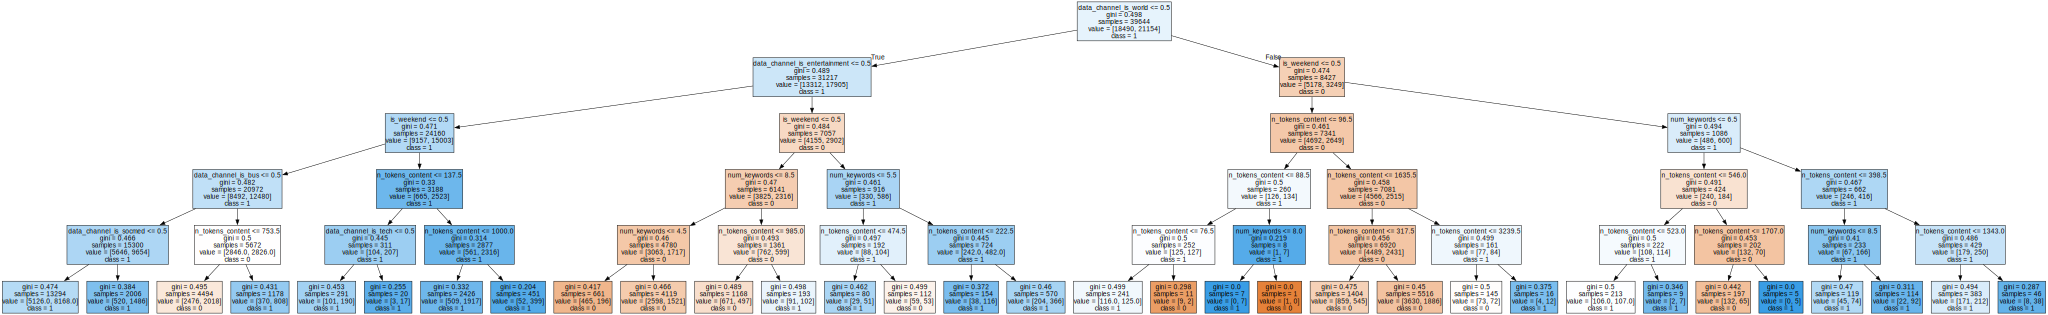

In [19]:
# fit a classification tree with max_depth=5
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

### Tree 3: Max Depth = 4

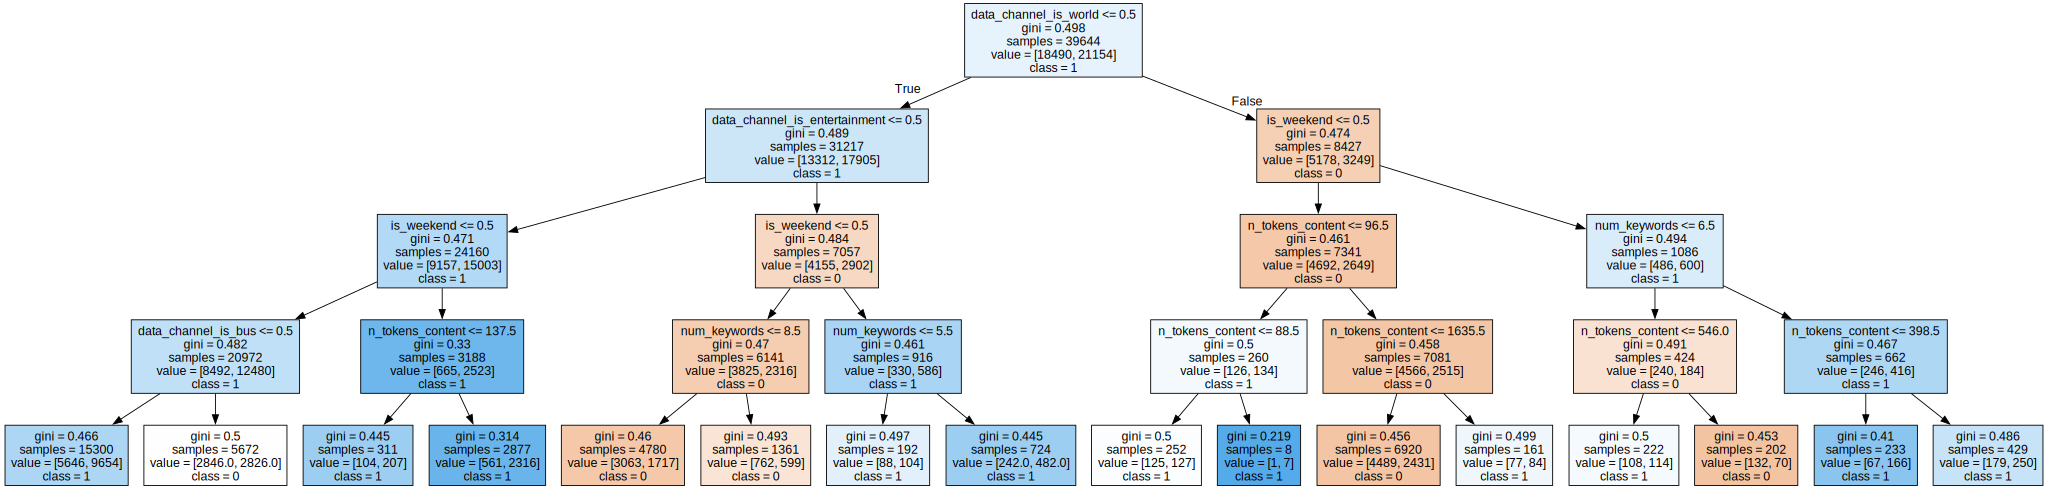

In [20]:
# fit a classification tree with max_depth=4
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)